In [130]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [132]:
df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [133]:
df.isna().any(axis=1).sum()

8335

In [134]:
len(df)

18524

In [135]:
(df.isna().sum(axis=1) > 1).sum()

819

In [136]:
df2 = df[df.isna().sum(axis=1) <= 1]
len(df2)

17705

In [137]:
df2.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [138]:
df2 = df2.replace(['Yes','No'],[1, 0])
df2.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1976\1828492609.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace(['Yes','No'],[1, 0])


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,Extrovert
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,Extrovert
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,Extrovert


In [139]:
df2.Personality = df2.Personality.replace(['Extrovert','Introvert'],[1, 0])
df2.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1976\3711711346.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.Personality = df2.Personality.replace(['Extrovert','Introvert'],[1, 0])


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,0
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,1


In [140]:
df2.drop(['id'],axis=1, inplace=True)
df2.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1
2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,0
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1
4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,1


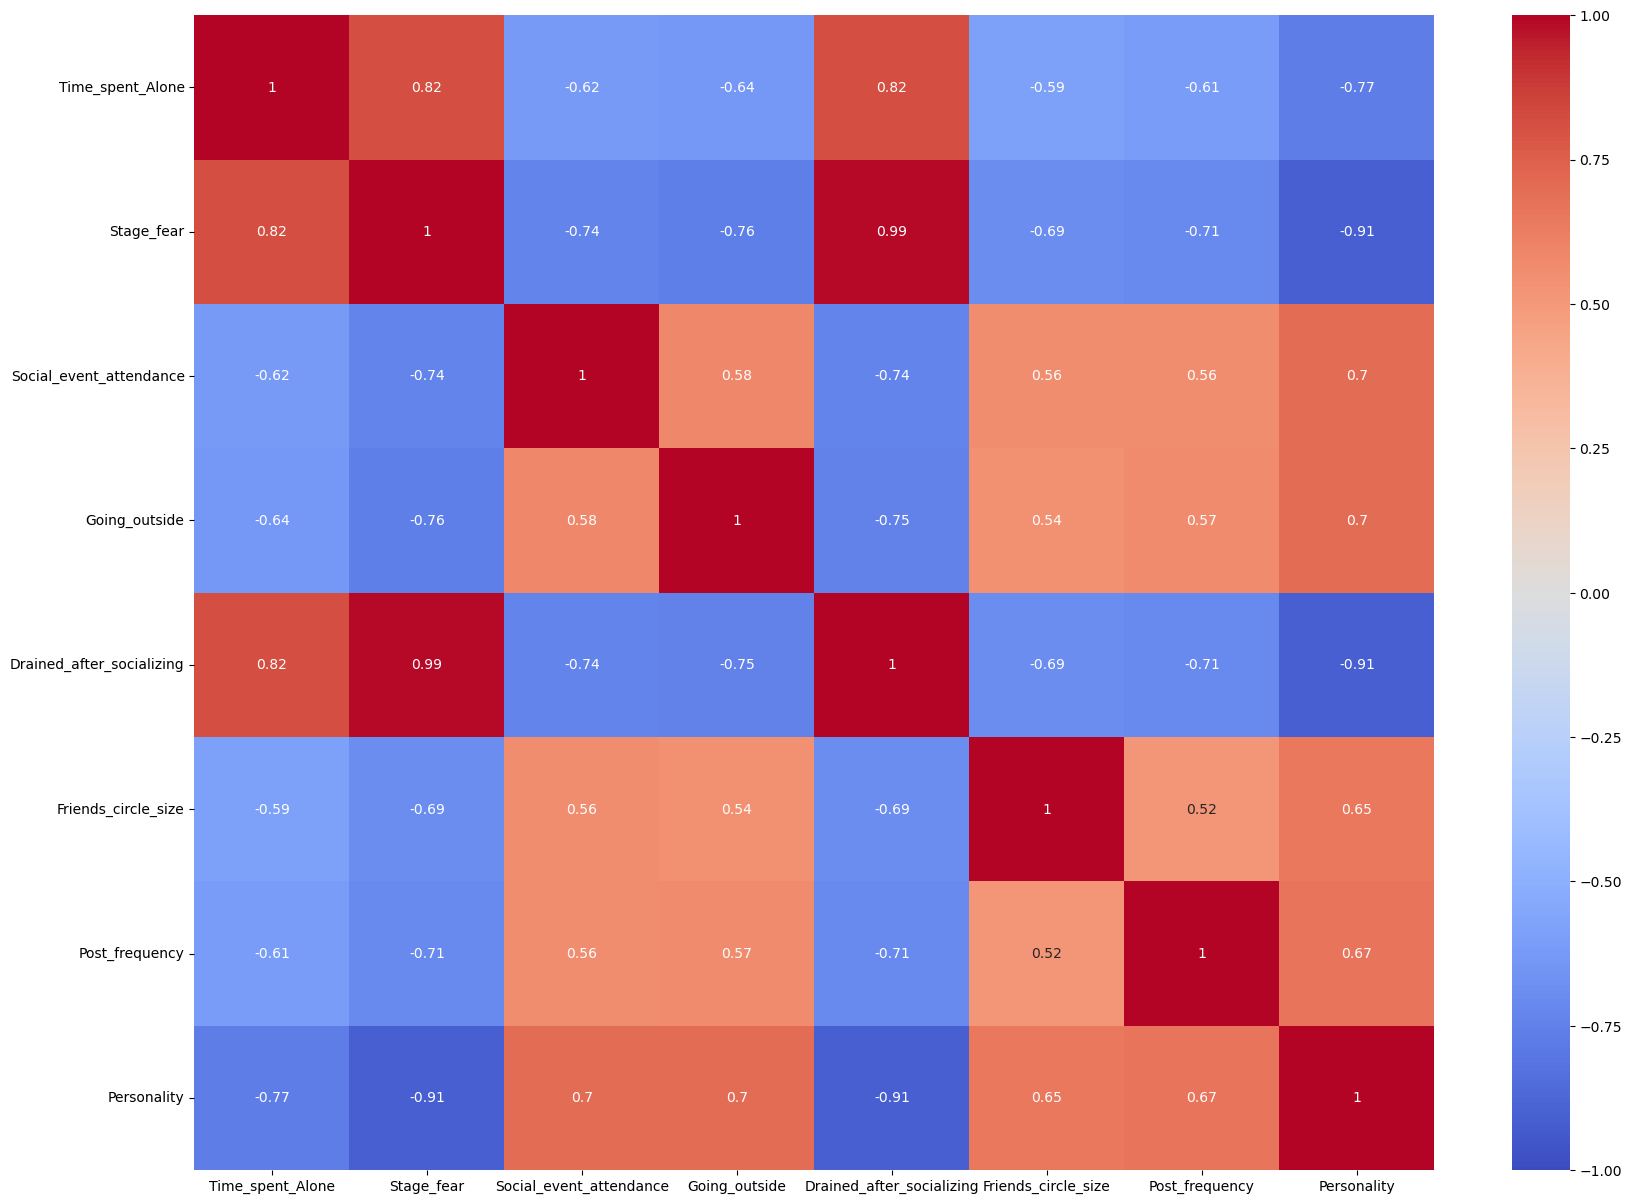

In [141]:
corr_mat=df2.corr()
corr_mat=np.around(corr_mat,decimals=2)
fig=plt.figure(figsize=(20, 15))
sn.heatmap(corr_mat, annot=True, fmt='g', vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

In [143]:
Y=df2['Personality']
X=df2.drop(['Personality'],axis=1)
print(Y.shape, X.shape)

(17705,) (17705, 7)


In [144]:
num_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside','Friends_circle_size','Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer,StandardScaler
from fancyimpute import KNN

In [146]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0
2,6.0,1.0,1.0,0.0,NaN,3.0,0.0
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0
4,1.0,0.0,4.0,4.0,0.0,13.0,NaN


In [147]:
X_imp = KNN(k=3).fit_transform(X)
X = pd.DataFrame(X_imp, columns=X.columns, index=X.index)

Imputing row 1/17705 with 0 missing, elapsed time: 35.957
Imputing row 101/17705 with 1 missing, elapsed time: 35.957
Imputing row 201/17705 with 1 missing, elapsed time: 35.957
Imputing row 301/17705 with 0 missing, elapsed time: 35.957
Imputing row 401/17705 with 1 missing, elapsed time: 35.973
Imputing row 501/17705 with 1 missing, elapsed time: 35.973
Imputing row 601/17705 with 0 missing, elapsed time: 35.973
Imputing row 701/17705 with 0 missing, elapsed time: 35.973
Imputing row 801/17705 with 1 missing, elapsed time: 35.989
Imputing row 901/17705 with 1 missing, elapsed time: 35.989
Imputing row 1001/17705 with 0 missing, elapsed time: 35.989
Imputing row 1101/17705 with 1 missing, elapsed time: 35.989
Imputing row 1201/17705 with 1 missing, elapsed time: 35.989
Imputing row 1301/17705 with 1 missing, elapsed time: 36.005
Imputing row 1401/17705 with 0 missing, elapsed time: 36.005
Imputing row 1501/17705 with 0 missing, elapsed time: 36.005
Imputing row 1601/17705 with 1 missi

In [148]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,0.0,6.0,4.0,0.0,15.0,5.000000
1,1.0,0.0,7.0,3.0,0.0,10.0,8.000000
2,6.0,1.0,1.0,0.0,1.0,3.0,0.000000
3,3.0,0.0,7.0,3.0,0.0,11.0,5.000000
4,1.0,0.0,4.0,4.0,0.0,13.0,8.666667


In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape,X_test.shape)

(14164, 7) (3541, 7)


In [150]:
Scal=StandardScaler()
X_train = Scal.fit_transform(X_train[num_features])
X_test=Scal.transform(X_test[num_features])
print(X_train.shape,X_test.shape)

(14164, 5) (3541, 5)


In [151]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
def scores():
    print('Acc. Score: ', accuracy_score(Y_test,Y_pred))
    print('F1 Score: ', f1_score(Y_test,Y_pred))
    print('Precision: ', precision_score(Y_test,Y_pred))
    print('Recall: ', recall_score(Y_test,Y_pred))  
def confus_mat():
    LABELS = ['Introvert', 'Extrovert']
    conf_mat = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(5, 5))
    sn.heatmap(conf_mat, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cbar=False, cmap='Greens');
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
def var():
    print('Train accuracy: ', accuracy_score(Y_train,Y_pred_train))
    print('Test accuracy: ', accuracy_score(Y_test,Y_pred))
def metrics():
    scores()
    confus_mat()
    var()

### kNN classifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier

Acc. Score:  0.9692177351030782
F1 Score:  0.9792183031458532
Precision:  0.9786585365853658
Recall:  0.9797787104158718


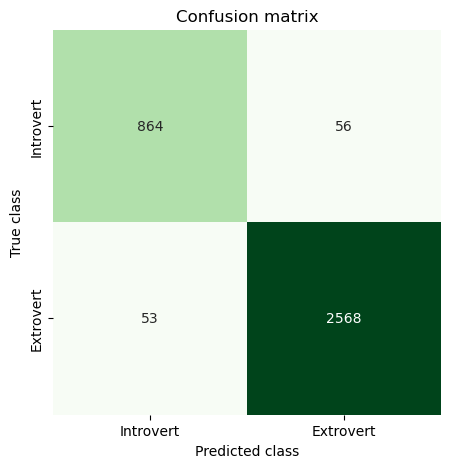

Train accuracy:  0.9690059305280994
Test accuracy:  0.9692177351030782


In [153]:
kNN=KNeighborsClassifier()
kNN.fit(X_train,Y_train)
Y_pred=kNN.predict(X_test)
Y_pred_train=kNN.predict(X_train)
metrics()

### logistic regression

In [154]:
from sklearn.linear_model import LogisticRegression

Acc. Score:  0.9703473595029652
F1 Score:  0.979965655409273
Precision:  0.9801526717557252
Recall:  0.9797787104158718


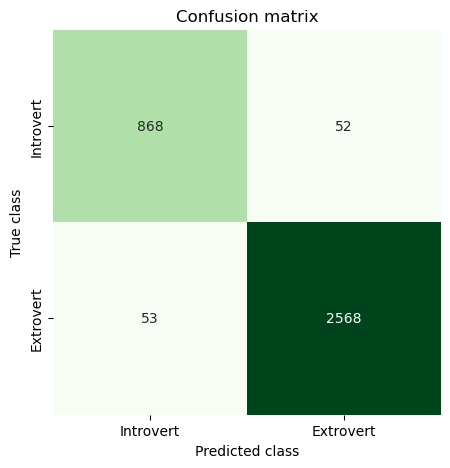

Train accuracy:  0.9685823213781418
Test accuracy:  0.9703473595029652


In [155]:
logi=LogisticRegression()
logi.fit(X_train,Y_train)
Y_pred=logi.predict(X_test)
Y_pred_train=logi.predict(X_train)
metrics()

### Test data set (output)

In [156]:
df_op = pd.read_csv('data/test.csv')
df_op.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [176]:
X_op=df_test.drop(['id'],axis=1)
X_op.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,No,7.0,4.0,No,6.0,NaN
1,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [177]:
X_op = X_op.replace(['Yes','No'],[1, 0])
X_op.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1976\2905924565.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_op = X_op.replace(['Yes','No'],[1, 0])


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,0.0,7.0,4.0,0.0,6.0,NaN
1,NaN,1.0,0.0,0.0,1.0,5.0,1.0
2,3.0,0.0,5.0,6.0,0.0,15.0,9.0
3,3.0,0.0,4.0,4.0,0.0,5.0,6.0
4,9.0,1.0,1.0,2.0,1.0,1.0,1.0


In [178]:
X_imp = KNN(k=3).fit_transform(X_op)
X_op = pd.DataFrame(X_imp, columns=X_op.columns, index=X_op.index)

Imputing row 1/6175 with 1 missing, elapsed time: 4.458
Imputing row 101/6175 with 1 missing, elapsed time: 4.458
Imputing row 201/6175 with 0 missing, elapsed time: 4.458
Imputing row 301/6175 with 0 missing, elapsed time: 4.458
Imputing row 401/6175 with 1 missing, elapsed time: 4.458
Imputing row 501/6175 with 0 missing, elapsed time: 4.474
Imputing row 601/6175 with 1 missing, elapsed time: 4.474
Imputing row 701/6175 with 1 missing, elapsed time: 4.474
Imputing row 801/6175 with 0 missing, elapsed time: 4.474
Imputing row 901/6175 with 1 missing, elapsed time: 4.474
Imputing row 1001/6175 with 1 missing, elapsed time: 4.474
Imputing row 1101/6175 with 1 missing, elapsed time: 4.474
Imputing row 1201/6175 with 1 missing, elapsed time: 4.474
Imputing row 1301/6175 with 1 missing, elapsed time: 4.490
Imputing row 1401/6175 with 0 missing, elapsed time: 4.490
Imputing row 1501/6175 with 2 missing, elapsed time: 4.490
Imputing row 1601/6175 with 1 missing, elapsed time: 4.490
Imputing 

In [169]:
X_op.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.000000,0.0,7.0,4.0,0.0,6.0,6.666667
1,8.333333,1.0,0.0,0.0,1.0,5.0,1.000000
2,3.000000,0.0,5.0,6.0,0.0,15.0,9.000000
3,3.000000,0.0,4.0,4.0,0.0,5.0,6.000000
4,9.000000,1.0,1.0,2.0,1.0,1.0,1.000000


In [179]:
X_op=Scal.transform(X_op[num_features])
Y_op=logi.predict(X_op)

In [180]:
df_out = df_op['id'].to_frame()

In [181]:
df_out['Personality'] = np.array(Y_op)
df_out.head()

,id,Personality
0,18524,1
1,18525,0
2,18526,1
3,18527,1
4,18528,0


In [182]:
df_out.Personality = df2.Personality.replace([1, 0],['Extrovert','Introvert'])
df_out.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Introvert
3,18527,Extrovert
4,18528,Extrovert


In [183]:
df_out.to_csv('data/output_data.csv', index=False)